In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
import nltk
import re
import string
import nltk
import nltk.sentiment
nltk.download('stopwords')
nltk.download('vader_lexicon')
nltk.download('liu_hu_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
sns.set_style('darkgrid')
stopwords=list(set(stopwords.words('english')))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Error loading liu_hu_lexicon: Package 'liu_hu_lexicon' not
[nltk_data]     found in index


/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [0]:
#create a function that will split the script into a dataframe object based off provided seperator(sep_type)
def split_and_df(split_obj,sep_type):
  if sep_type=='sent':
    obj=split_obj.split('.')
    #create array/dict
    obj_dict=dict(zip(np.asarray(range(0,len(obj))),obj))
    df=pd.DataFrame.from_dict(obj_dict,orient='index').reset_index()
    df.columns=['sent_num','sent']
    return df
  if sep_type=='word':
    split_obj=split_obj.replace('\n',' ')
    obj=split_obj.split(' ')
    #create array/dict
    obj_dict=dict(zip(np.asarray(range(0,len(obj))),obj))
    df=pd.DataFrame.from_dict(obj_dict,orient='index').reset_index()
    df.columns=['word_num','word']
    return df
  if sep_type=='line':
    obj=split_obj.split('\n')
    #create array/dict
    obj_dict=dict(zip(np.asarray(range(0,len(obj))),obj))
    df=pd.DataFrame.from_dict(obj_dict,orient='index').reset_index()
    df.columns=['line_num','line']
    return df
  else:
    return 'Error'
#create a function that will return the sentiment for a string of words using vader
def get_sent(words):
  vader_analyzer = SentimentIntensityAnalyzer()
  try:
    sentence=''.join(words)
    sentiment=vader_analyzer.polarity_scores(sentence)
    return sentiment['compound']
  except:
    pass
#create a function that returns only dialogue (to be used primarily with books)
def get_dialogue(words):
  try:
    new_string=re.search(r'"(.*?)"', words)
    return new_string.group(1)
  except:
    pass
#create a function to remove punctuation from a string of words (words)  
def clean(words):
  try:
    words = words.split()
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in words]
    stripped=[x.lower() for x in stripped]
    return stripped[0]
  except:
    pass
#create a function that opens a provided path and reads it using read()
def open_doc(path):
  doc=path
  doc=open(doc,'r',encoding="utf8", errors='ignore')
  return doc.read()
#function for graphing a line graph of sentiments from a 'get_sent' dataframe
def line_graphs(graph_obj,fig_size):
  print('Sentiment Line Plot')
  plt.figure(figsize=fig_size)
  sns.lineplot(x=graph_obj[graph_obj.columns[0]],y=graph_obj.sent,linewidth=3,color='red')
#function to plot the distribution of sentiment in a corpus on a histogram  
def sent_dist(graph_obj,bins,fig_size):
  print('Sentiment Distribution')
  plt.figure(figsize=fig_size)
  sns.distplot(actual_sent.sent,bins=bins,rug=True,color='green')
#function to print the most polarized lines from a corpus  
def poles(obj,sent):
  if sent=='neg':
    neg=obj[obj.sent==(obj.sent.min())]
    return neg
  if sent=='pos':
    pos=obj[obj.sent==(obj.sent.max())]
    return pos
#function to aggregate sentiment on a line to line basis based off groups of lines (line_group_size)   
def bin_sent(array,line_group_size):
  group_num=int(len(array)/line_group_size)
  mean_dict={}
  beg=0
  for x in range(0,group_num):
    #slice that shit
    get_slice=array.loc[beg:beg+line_group_size]
    sent_mean=np.mean(get_slice['sent'])
    mean_dict.update({x:[sent_mean]})    
    beg+=line_group_size   
  bin_sent_df=pd.DataFrame.from_dict(mean_dict,orient='index').reset_index()
  bin_sent_df.columns=['line_group','sent']
  return bin_sent_df

In [0]:
#open document and prepare it for analysis
text=open_doc('/content/pulp_fiction_script_full.txt')
lines=split_and_df(text,'line')
lines=lines[-lines.line.str.contains('#')]
lines=lines[-lines.line.str.contains(']')]
lines['sent']=lines.line.apply(get_sent)
actual_sent=lines[lines.sent!=0]

Sentiment Line Plot


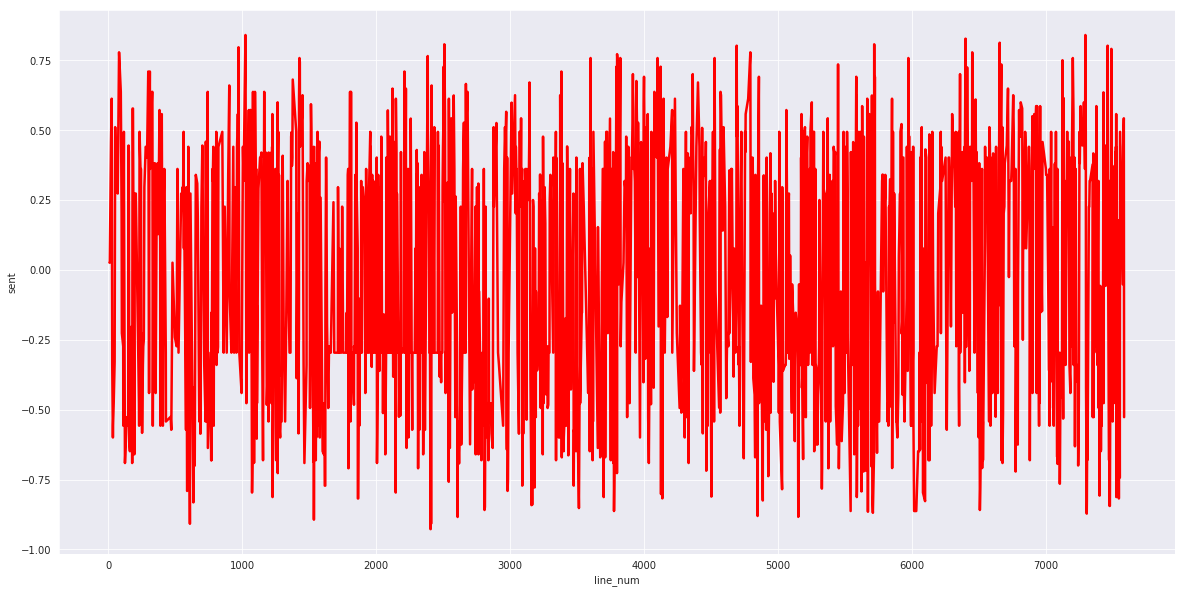

In [19]:
#line graph of sentiment by every line
line_graphs(actual_sent,(20,10))

Sentiment Line Plot


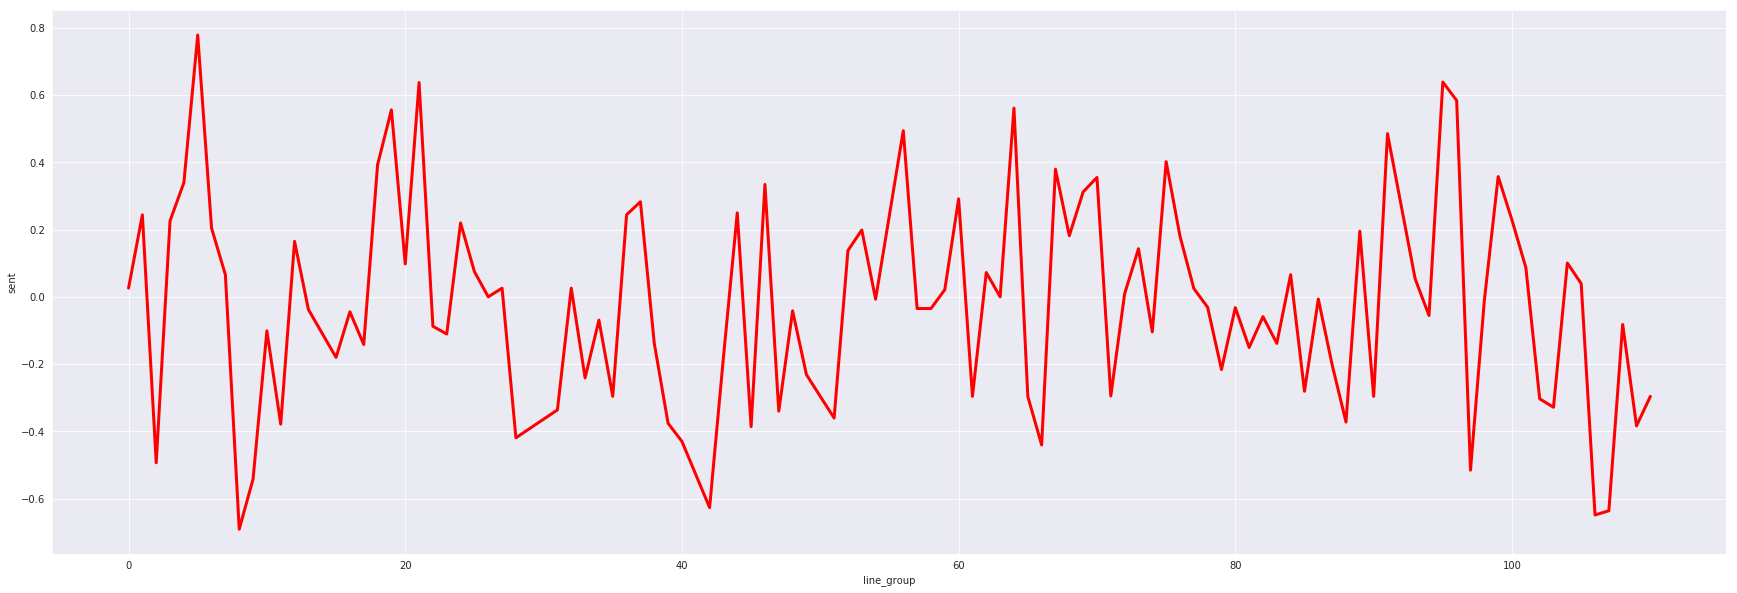

In [26]:
binned_sent_df=bin_sent(actual_sent,15)
line_graphs(binned_sent_df,(30,10))

In [25]:
find_binned_lines(lines,5,50,10)

,line_num,line,sent
245,245,Correct. Just like ba...,0.3612
246,246,are insured. The mana...,0.0000
247,247,"a fuck, they're just ...",-0.5423
248,248,ya out the door befor...,0.0000
249,249,pluggin' diners. Wai...,-0.2263
250,250,"it, they ain't takin'...",0.0000
251,251,the register. Busboys...,0.0000
252,252,gettin' paid a dollar...,0.0000
253,253,gonna really give a f...,-0.5829
254,254,stealin' from the own...,0.0000


In [20]:
print('Positive Line','\n',poles(actual_sent,'pos'),'\n''\n','Negative Line','\n',poles(actual_sent,'neg'))

Positive Line 
       line_num                                               line    sent
1025      1025                           Vince, where you got ...  0.8402
7297      7297                 Like a rattlesnake, Jules' free...  0.8402 

 Negative Line 
       line_num                                               line    sent
2407      2407                           No, no, no no, no, no... -0.9274


In [0]:
word=split_and_df(text,'word')
word=word[-word.isin(stopwords)].dropna(how='any')
word.word=word.word.apply(clean)

In [23]:
word=word.dropna(how='any')
word[word.word.str.contains('fuck')].word.value_counts()

fuckin                            91
fuck                              31
motherfucker                      18
motherfuckers                      7
fucked                             7
motherfuckin                       4
fucks                              4
fucking                            3
fuckedup                           1
fucker                             1
motherfuckinhouse                  1
englishmotherfuckercanyouspeak     1
Name: word, dtype: int64